In [1]:
library(igraph)
set.seed(0)

Warning message:
"package 'igraph' was built under R version 3.4.4"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



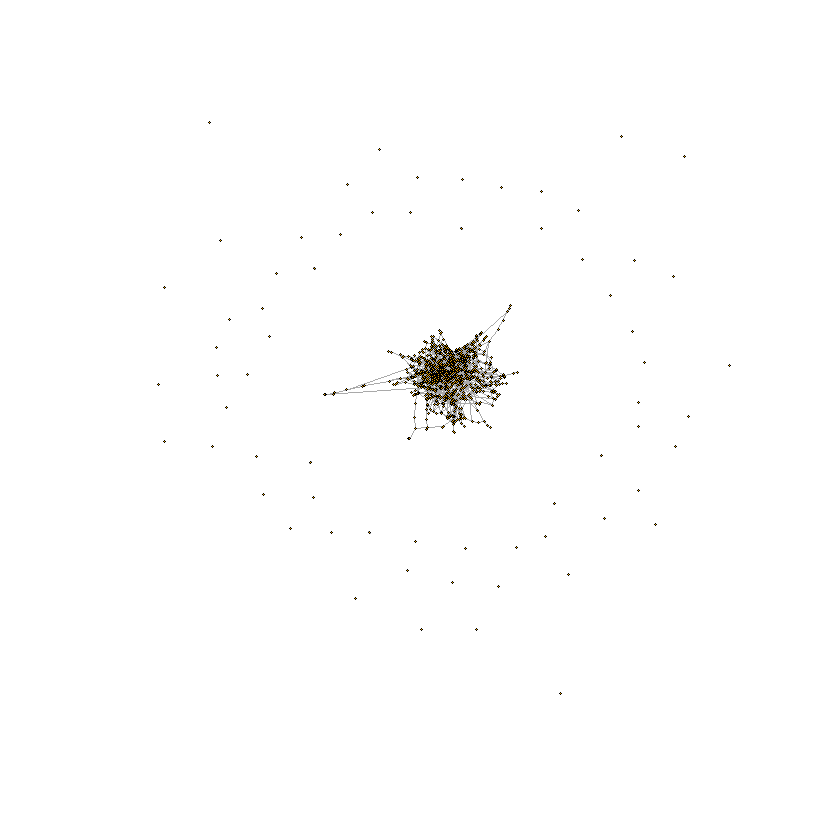

[1] "The mean of degree distribution is 3.004"
[1] "The variance of degree distribution is 3.09708108108108"


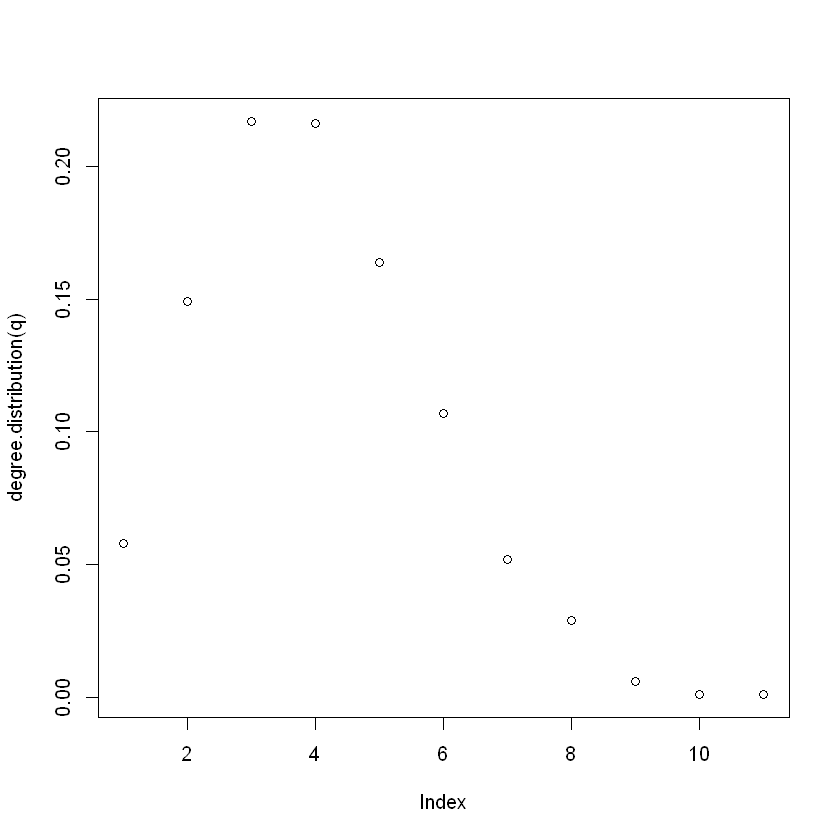

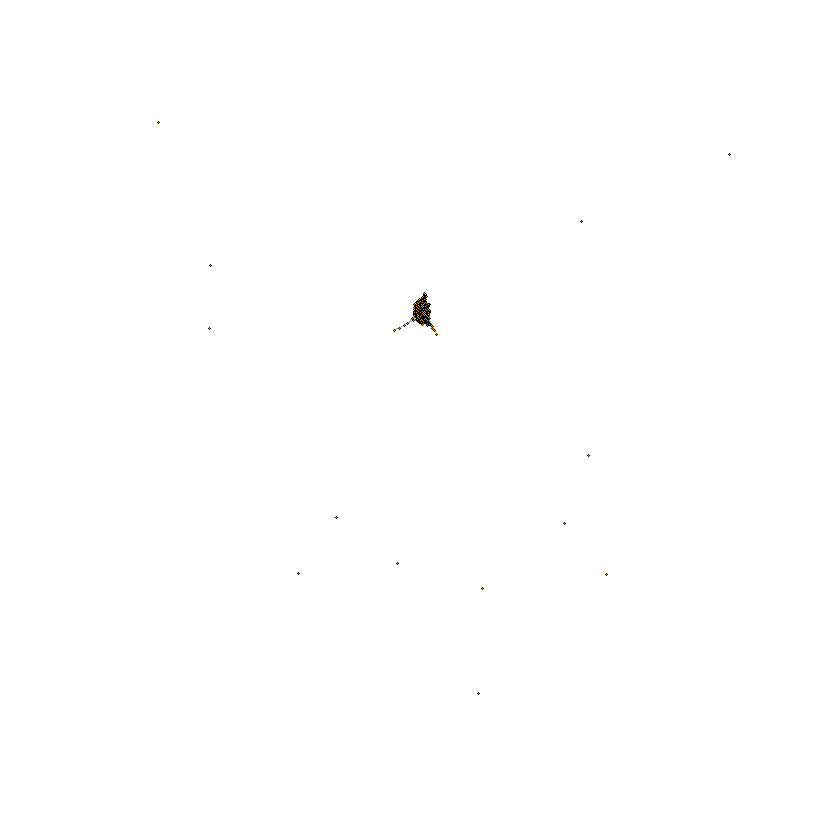

[1] "The mean of degree distribution is 4.1"
[1] "The variance of degree distribution is 4.06806806806807"


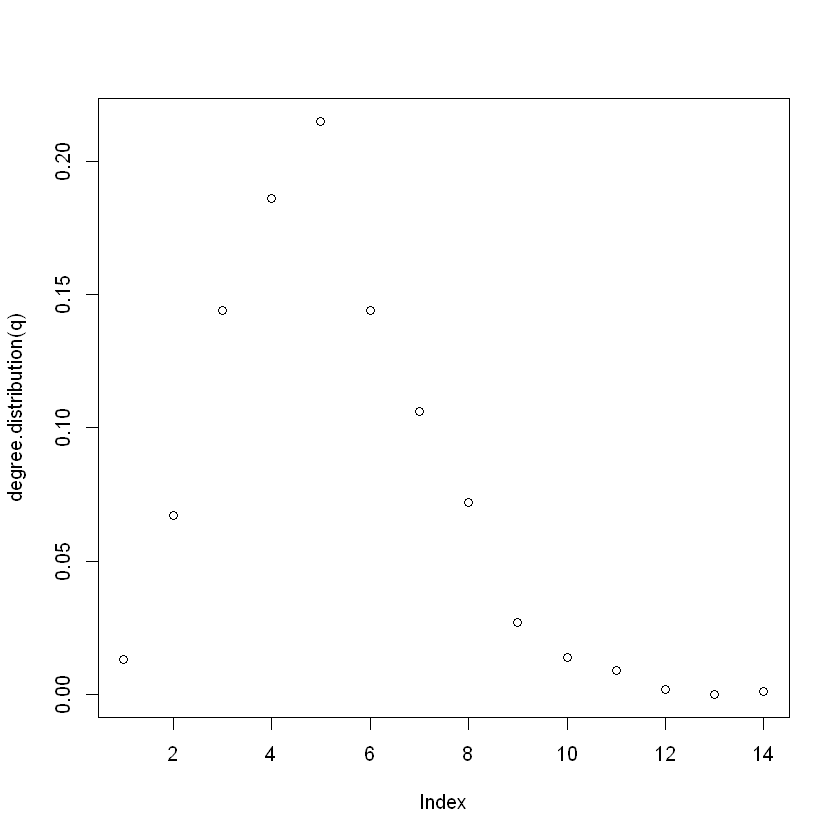

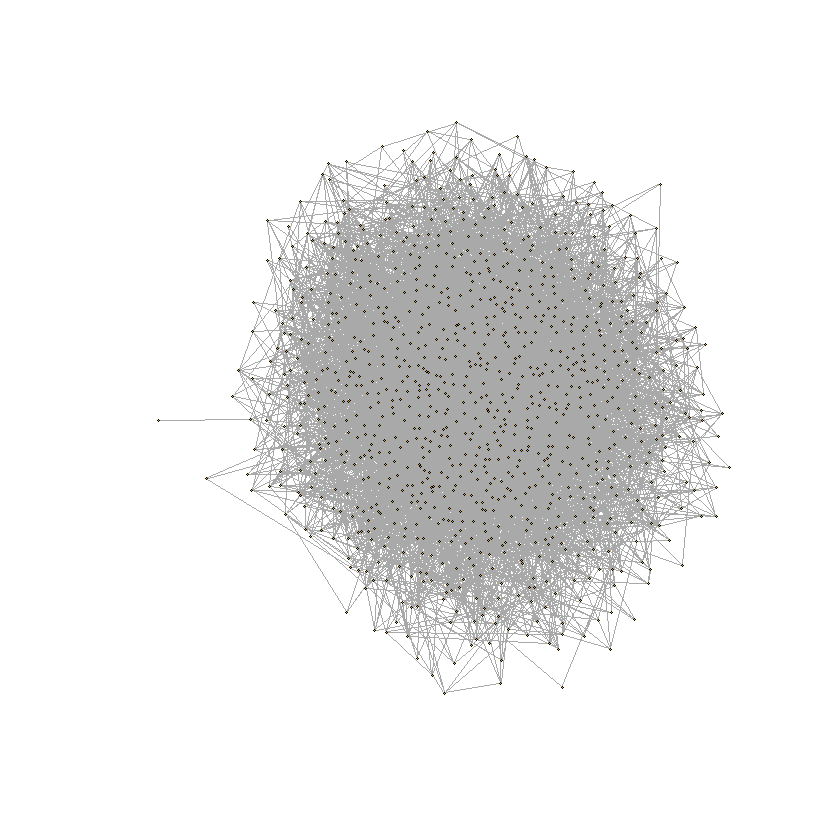

[1] "The mean of degree distribution is 9.802"
[1] "The variance of degree distribution is 9.38217817817818"


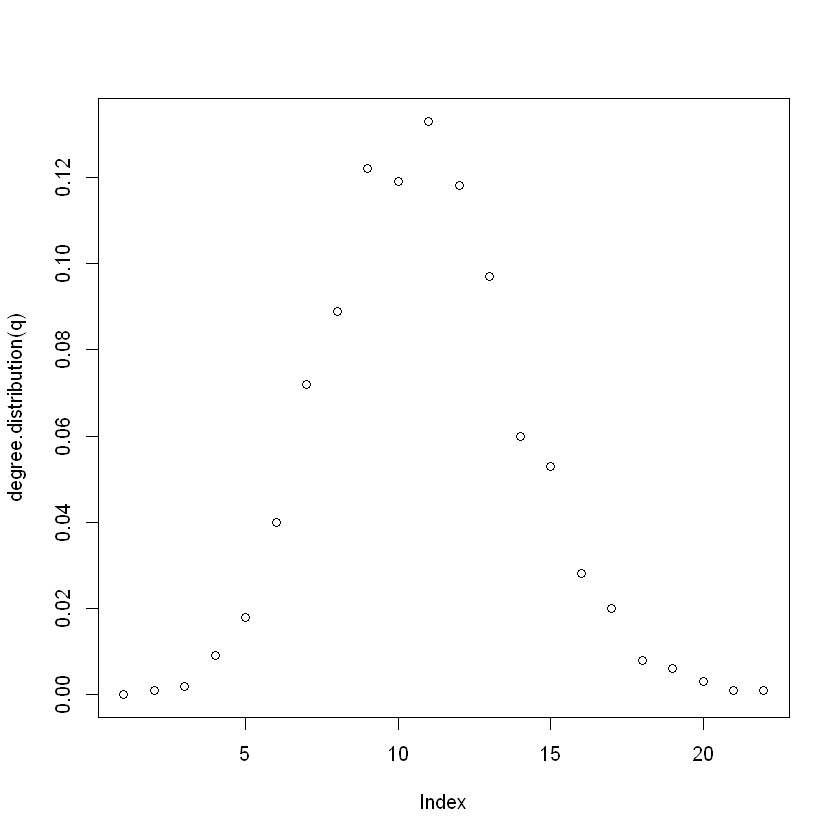

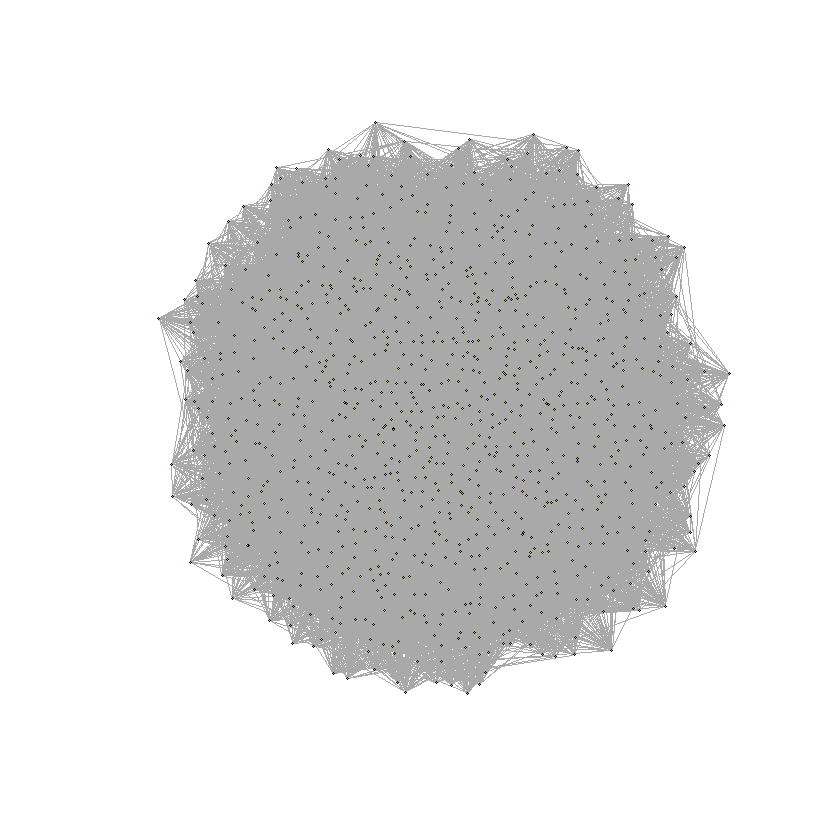

[1] "The mean of degree distribution is 50.264"
[1] "The variance of degree distribution is 45.4657697697698"


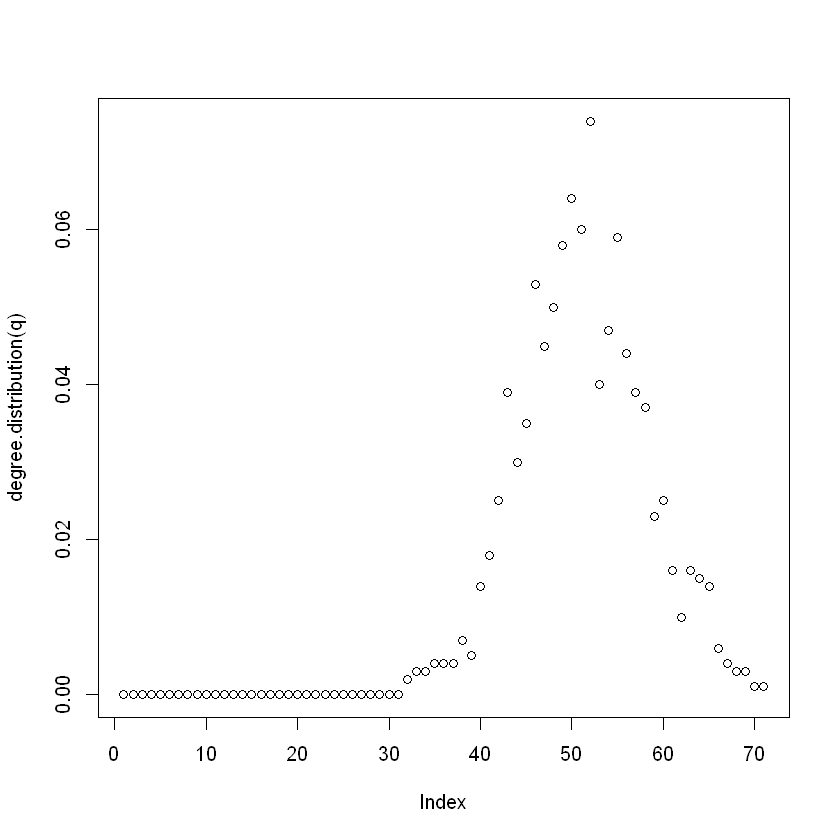

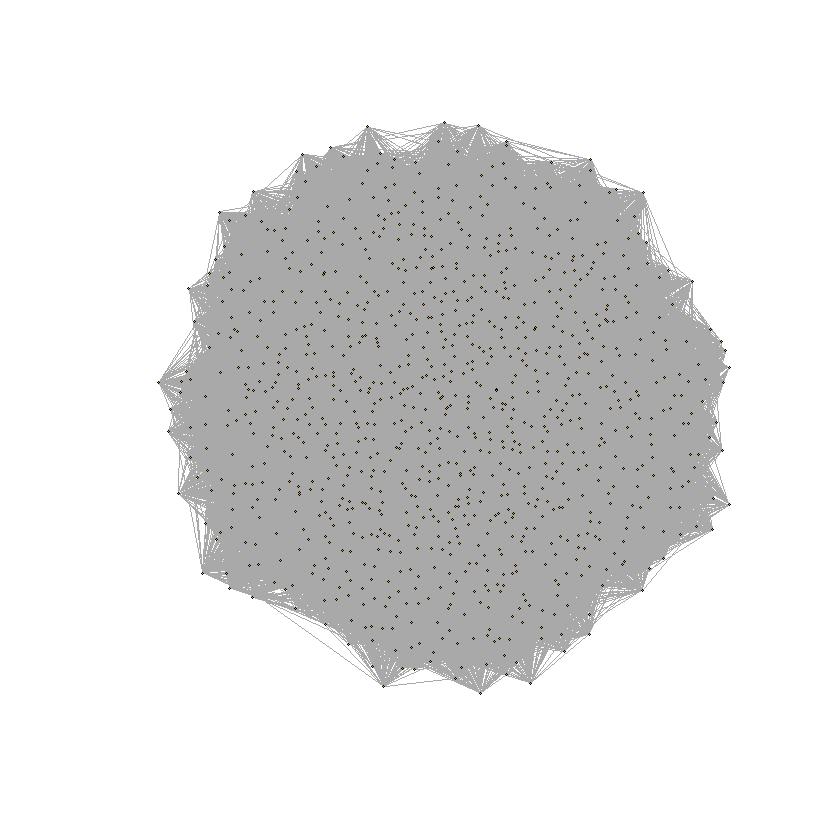

[1] "The mean of degree distribution is 100.246"
[1] "The variance of degree distribution is 95.517001001001"


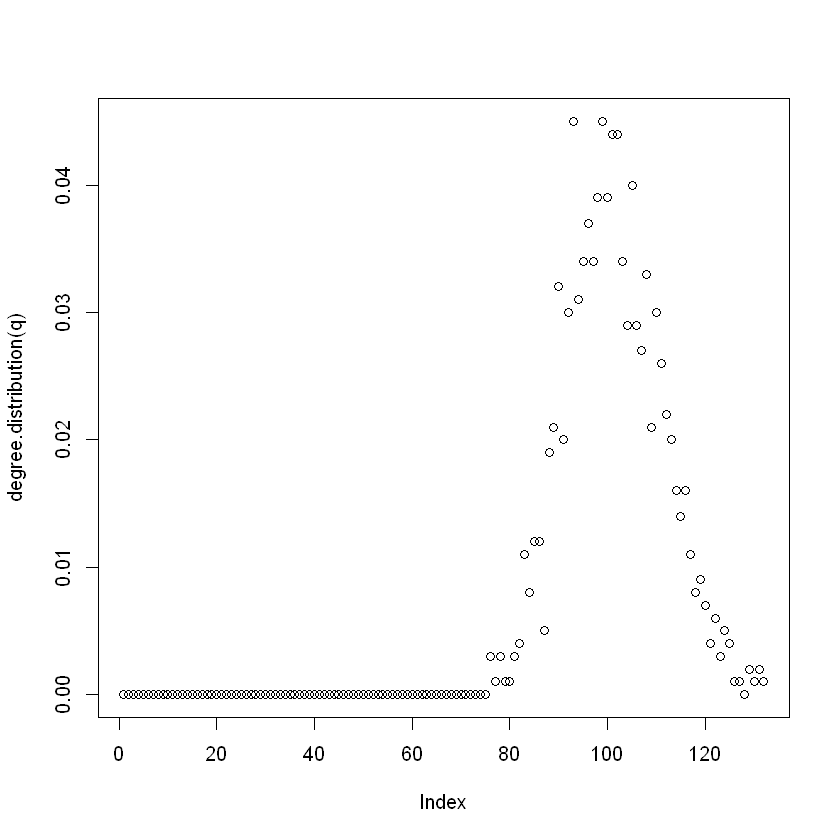

In [3]:
#Question 1a
for (p in c(0.003,0.004,0.01,0.05,0.1)){
    q = erdos.renyi.game(1000,p=p,directed = F)
    plot(q, vertex.size=1, vertex.label=NA)
    plot(degree.distribution(q))
    print(paste("The mean of degree distribution is", mean(degree(q))))
    print(paste("The variance of degree distribution is", var(degree(q))))
}

[1] "Is the graph connected? FALSE"
[1] "The diameter of GCC is 13"
[1] "Is the graph connected? FALSE"


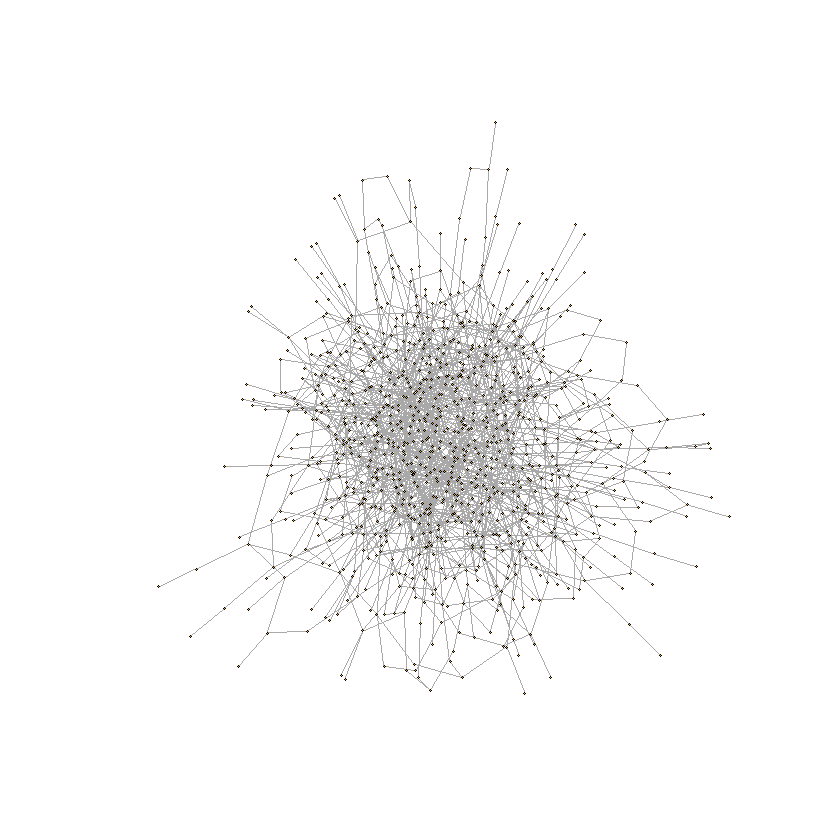

[1] "The diameter of GCC is 11"
[1] "Is the graph connected? TRUE"


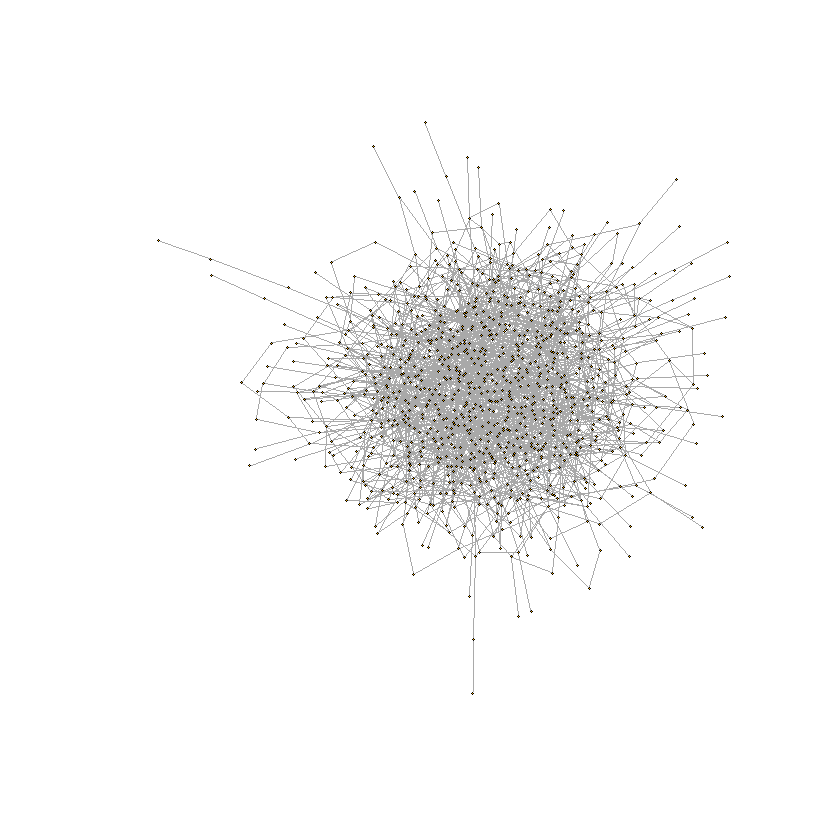

[1] "The diameter of GCC is 5"
[1] "Is the graph connected? TRUE"


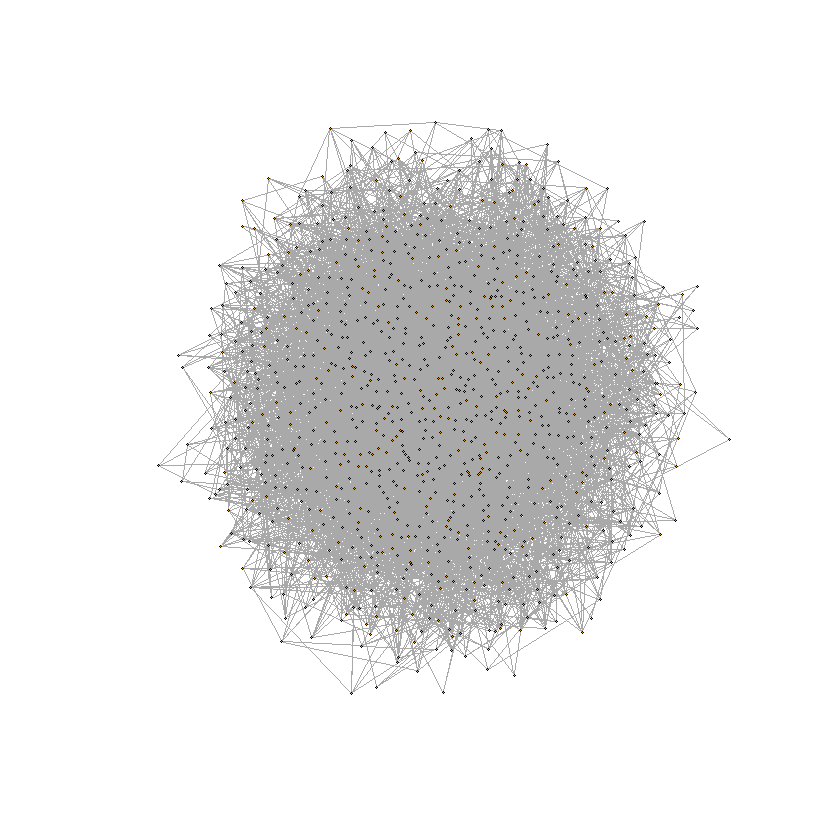

[1] "The diameter of GCC is 3"
[1] "Is the graph connected? TRUE"


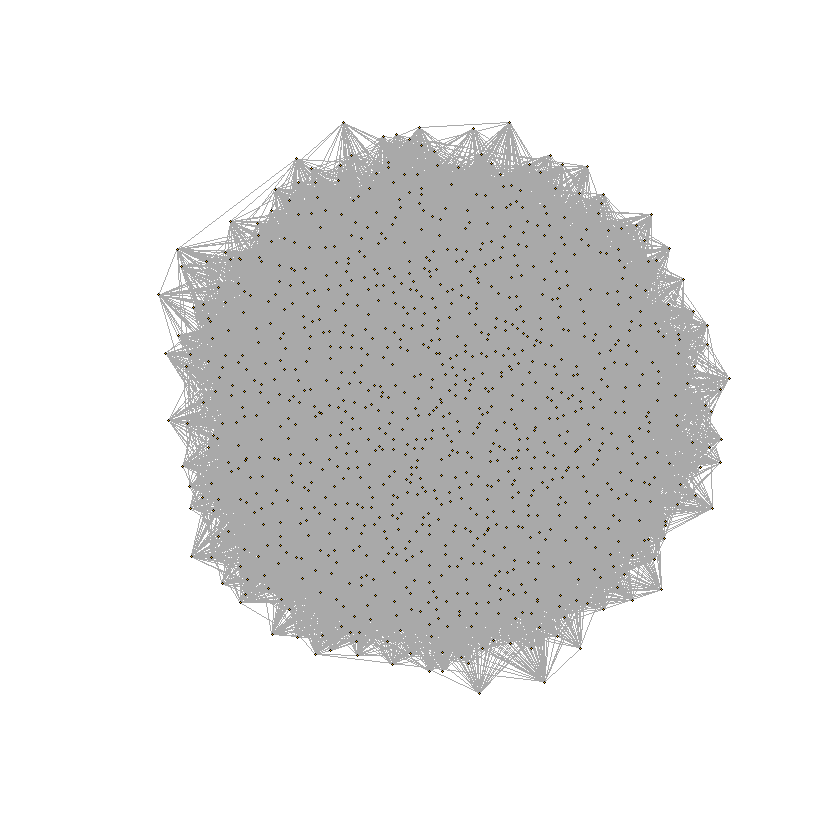

[1] "The diameter of GCC is 3"


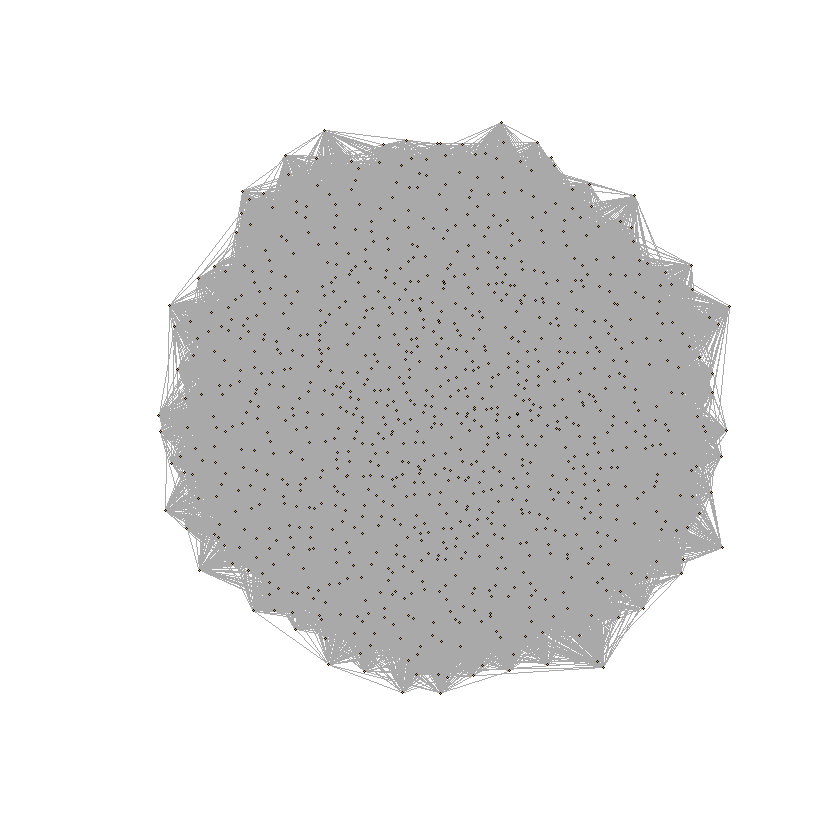

In [6]:
#Question 1b
for (p in c(0.003,0.004,0.01,0.05,0.1)){
    q = erdos.renyi.game(1000,p=p,directed = F)
    print(paste('Is the graph connected?', is.connected(q)))
    c <- clusters(q)
    subq <- induced.subgraph(q, which(c$membership == which.max(c$csize)))
    plot(subq, vertex.size=1, vertex.label=NA)
    print(paste('The diameter of GCC is', diameter(subq)))
}

Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"

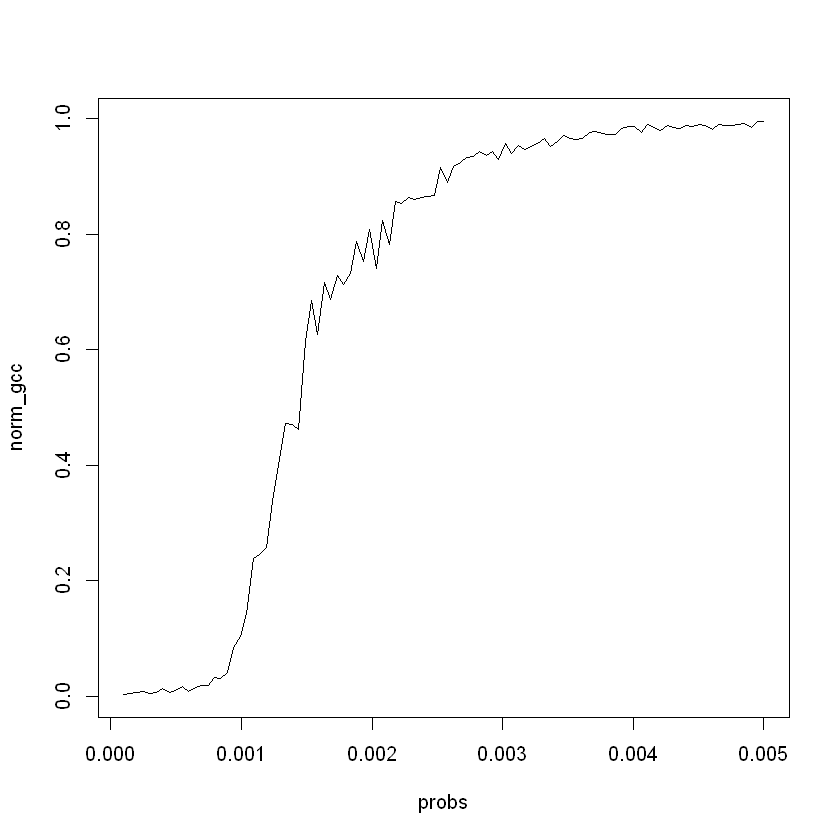

In [2]:
#Question 1c
probs <- seq(from = 0.0001, to = 0.005,length.out = 100)
norm_gcc <-vector("list", 100)
i<-1
for (p in probs){
    q = erdos.renyi.game(1000,p=p,directed = F)
    gcc <- max(clusters(q)$csize)/1000
    norm_gcc[[i]] <- gcc
    i <- i + 1
}
plot(x=probs,y=norm_gcc,'line')


Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"

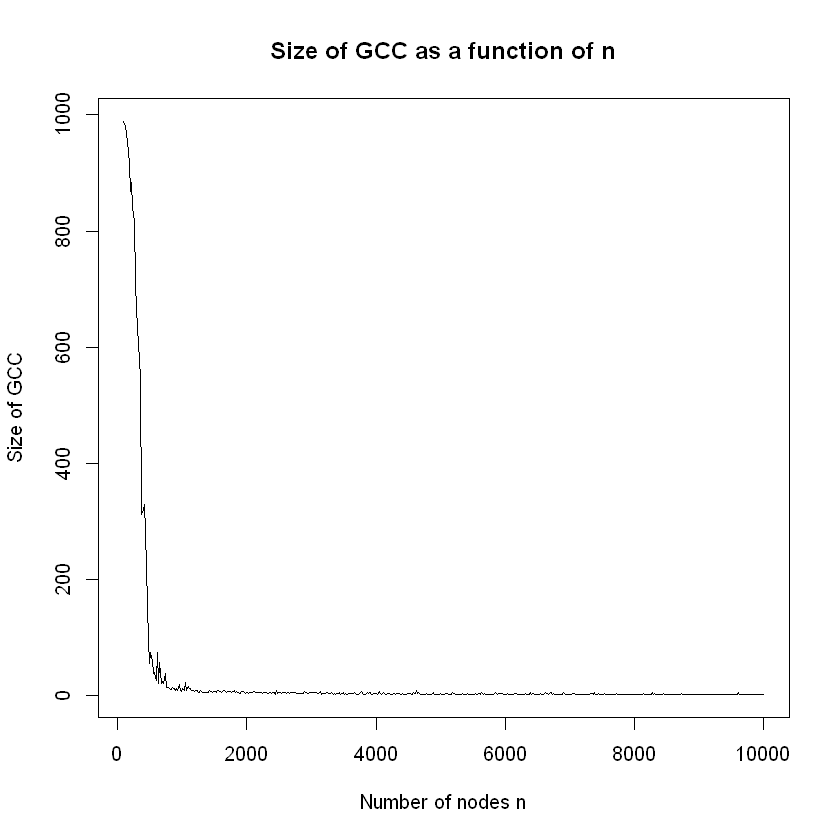

In [15]:
#Question 1d(i)
c=0.5
n_seq <- seq(from = 100, to = 10000, length.out = 500)
gcc_size <- vector('list',500)
i<- 1
for (n in n_seq){
    p <- c/n
    q = erdos.renyi.game(1000,p=p,directed = F)
    gcc_size[[i]] <- max(clusters(q)$csize)
    i <- i+1
}
plot(x=n_seq,y=gcc_size,'line',xlab='Number of nodes n',ylab='Size of GCC',main='Size of GCC as a function of n')

Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"

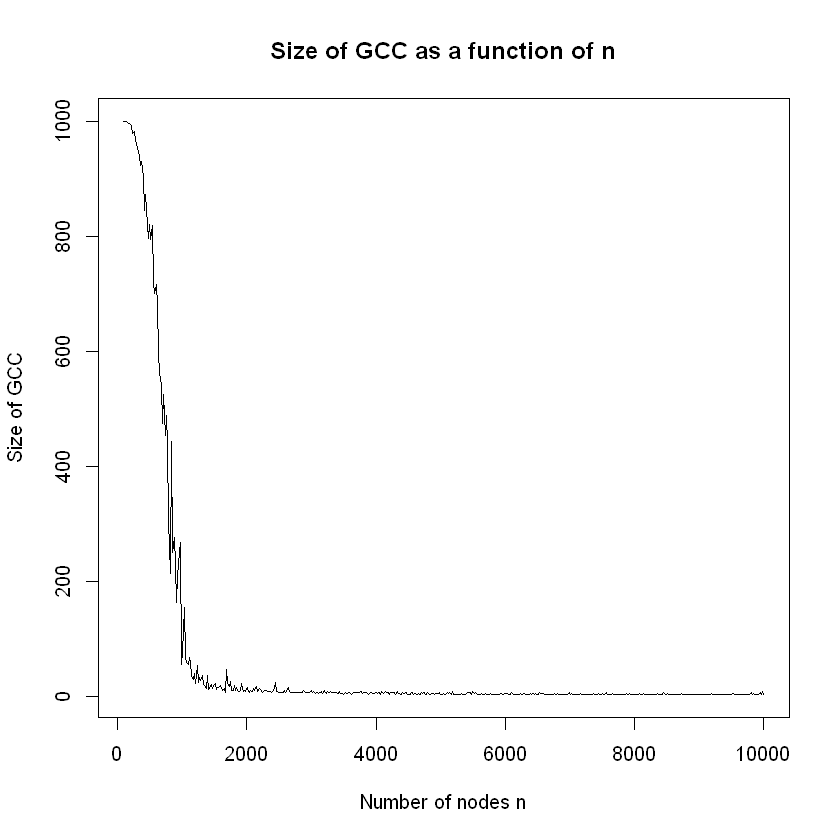

In [16]:
#Question 1d(ii)
c=1
n_seq <- seq(from = 100, to = 10000, length.out = 500)
gcc_size <- vector('list',500)
i<- 1
for (n in n_seq){
    p <- c/n
    q = erdos.renyi.game(1000,p=p,directed = F)
    gcc_size[[i]] <- max(clusters(q)$csize)
    i <- i+1
}
plot(x=n_seq,y=gcc_size,'line',xlab='Number of nodes n',ylab='Size of GCC',main='Size of GCC as a function of n')

Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"

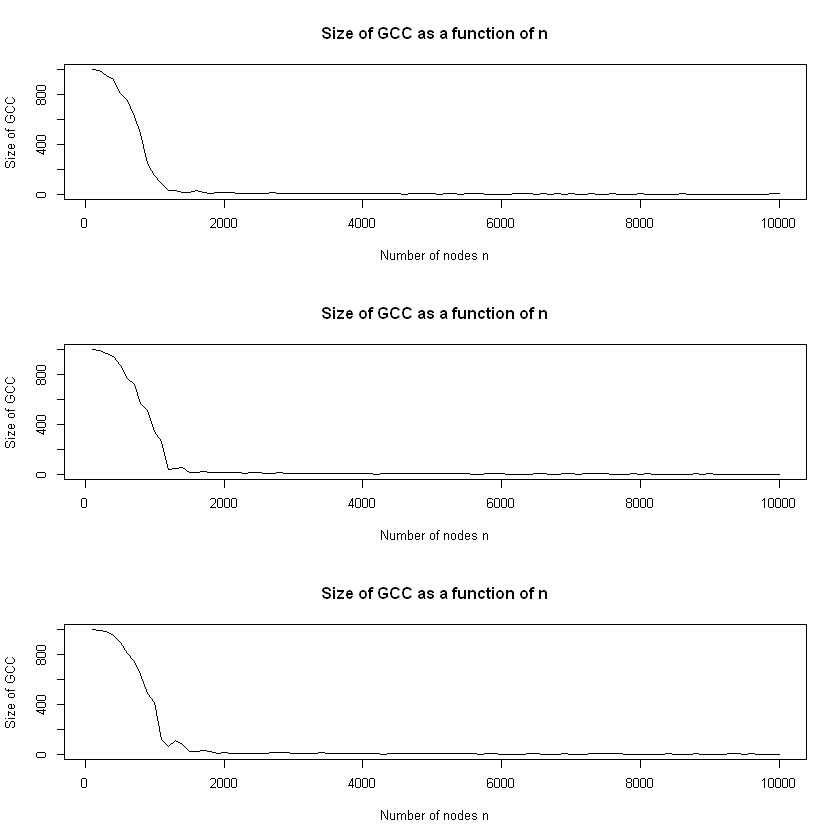

In [22]:
#Question 1d(iii)
n_seq <- seq(from = 100, to = 10000, length.out = 100)
gcc_size <- matrix(nrow=3,ncol=100)
j<-1
for (c in c(1.1,1.2,1.3)){
    i<- 1
    for (n in n_seq){
        p <- c/n
        q = erdos.renyi.game(1000,p=p,directed = F)
        gcc_size[[j,i]] <- max(clusters(q)$csize)
        i <- i+1
    }
    j <- j+1
}
par(mfrow=c(3,1)) 
plot(x=n_seq,y=gcc_size[1,],'line',xlab='Number of nodes n',ylab='Size of GCC',main='Size of GCC as a function of n')
plot(x=n_seq,y=gcc_size[2,],'line',xlab='Number of nodes n',ylab='Size of GCC',main='Size of GCC as a function of n')
plot(x=n_seq,y=gcc_size[3,],'line',xlab='Number of nodes n',ylab='Size of GCC',main='Size of GCC as a function of n')

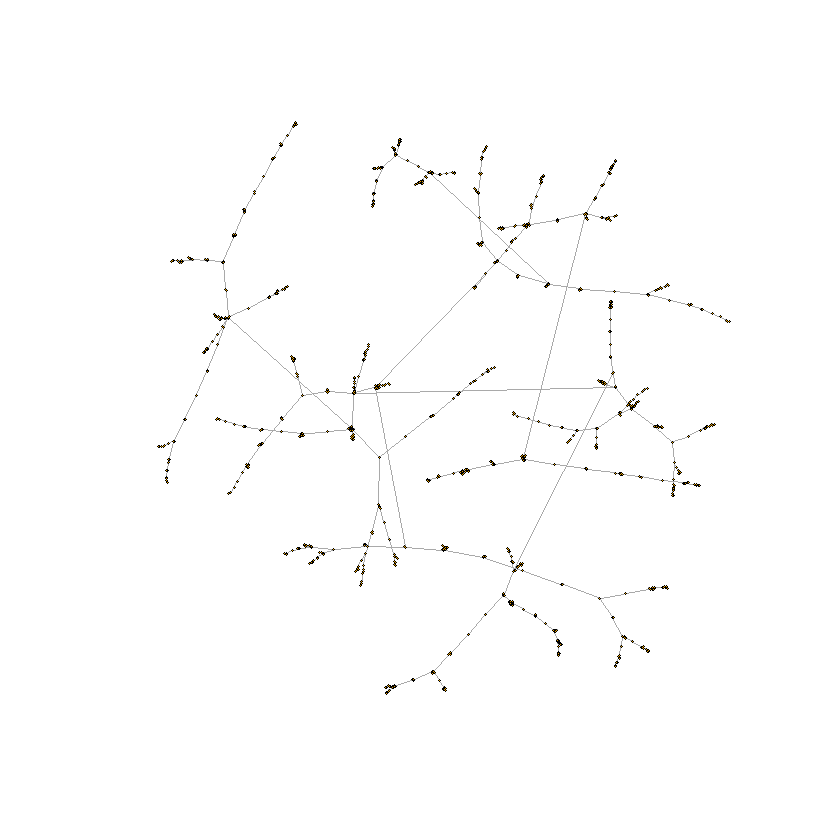

[1] "\nind = seq(length(deg))\nldeg = log(deg)\nlind = log(ind)\nlog_data = data.frame(lind,ldeg)\nlog_data = log_data[is.finite(rowSums(log_data)),]\nfit = lm(formula = log_data$ldeg ~ log_data$lind)\nplot(log_data$lind,log_data$ldeg)\nabline(fit)\npower_exp = coef(fit)[2]\nprint(power_exp)\n"

$continuous
[1] TRUE

$alpha
[1] 1.666985

$xmin
[1] 0.024

$logLik
[1] 7.094816

$KS.stat
[1] 0.1805097

$KS.p
[1] 0.9765049

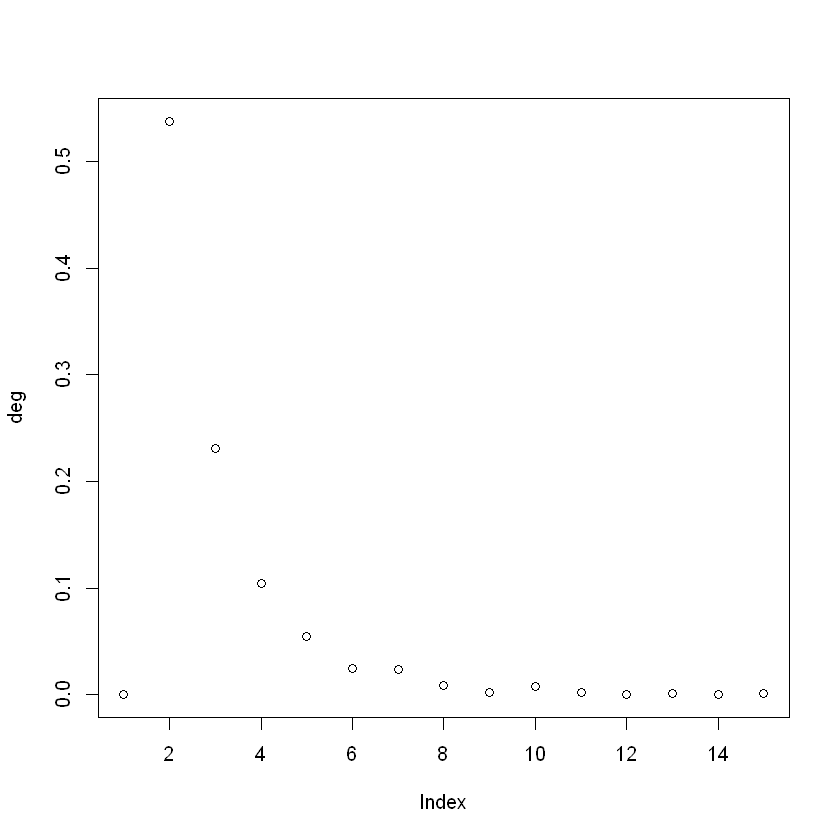

In [4]:
#Question 1.3a
g <- sample_pa_age(1000, pa.exp=1, aging.exp = -1, m = 1, aging.bin = 300, directed = F,
                   zero.deg.appeal = 1, zero.age.appeal = 0, deg.coef = 1, age.coef = 1)
plot(g, vertex.size=1, vertex.label=NA)
deg = degree.distribution(g)
plot(deg)
"
ind = seq(length(deg))
ldeg = log(deg)
lind = log(ind)
log_data = data.frame(lind,ldeg)
log_data = log_data[is.finite(rowSums(log_data)),]
fit = lm(formula = log_data$ldeg ~ log_data$lind)
plot(log_data$lind,log_data$ldeg)
abline(fit)
power_exp = coef(fit)[2]
print(power_exp)
"
fit_power_law(deg)

In [22]:
#Question 1.3b
comm = cluster_fast_greedy(g)
modularity(comm)

[1] 0.9353518